In [1]:
#### 0.그래프 그리는 데 필요한 설정

#기본 모듈
from matplotlib import pyplot as plt #for plot
import numpy as np
import pandas as pd

#데이터분석하고 연산하는 데 필요한 것들
from scipy.optimize import curve_fit, leastsq  #→ 최적화 피팅
#from tqdm import tqdm 
from scipy.stats import gaussian_kde 
import scipy as sc 
import math as math 

#그래프 폰트 크기 공통으로 설정
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


[52.52543193539678, 48.50933930698294, 37.4729902729953, 31.458338163355037, 31.233816449483086, 37.220008060181826, 49.42639982843177, 34.46882649583534, 10.704309879669964, 2.630698785494075, 1.9103319345077179, 7.314348227969462, 2.7584548029648777, 3.6366193091936365, 3.367825708079324, 3.984469851812158]


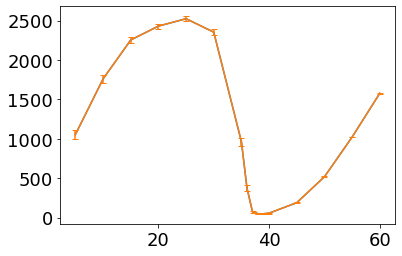

<Figure size 4000x2000 with 0 Axes>

In [2]:
#### 1. 2D XY Plot with errrorbar 


x = [5,10,15,20,25,   30,35,36,37,38,   39,40,45,50,55,   60]
y = [1054, 1760, 2254, 2430, 2524,   2353, 961.5, 374.6, 72.43, 48.22,    47.52, 55.11, 188.4, 517.3, 1021,   1577]
std = [1661, 1534, 1185, 994.8, 987.7,    1177, 1563, 1090, 338.5, 83.19,    60.41, 231.3, 87.23, 115, 106.5,  126]
Number_of_event = 1000
Number_of_bin = 16
Stat_error = [] 

for i in range(Number_of_bin):
    Stat_error.append(std[i]/pow(1000,0.5)) 

print(Stat_error)

plt.plot(x,y)
plt.errorbar(x,y,yerr=Stat_error,capsize=3)
plt.figure(figsize=(50, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.show() 

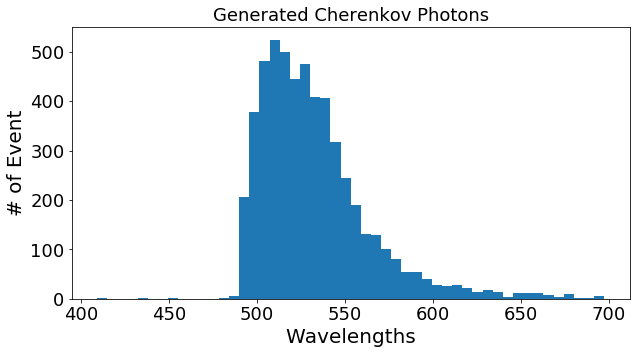

[  1   0   0   0   1   0   0   1   0   0   0   0   1   5 207 378 482 524
 499 445 476 408 406 318 244 189 132 129 101  80  54  54  41  28  26  28
  22  13  18  14   4  12  12  11   8   4  10   1   1   5] [409.025   414.78924 420.55348 426.31772 432.08196 437.8462  443.61044
 449.37468 455.13892 460.90316 466.6674  472.43164 478.19588 483.96012
 489.72436 495.4886  501.25284 507.01708 512.78132 518.54556 524.3098
 530.07404 535.83828 541.60252 547.36676 553.131   558.89524 564.65948
 570.42372 576.18796 581.9522  587.71644 593.48068 599.24492 605.00916
 610.7734  616.53764 622.30188 628.06612 633.83036 639.5946  645.35884
 651.12308 656.88732 662.65156 668.4158  674.18004 679.94428 685.70852
 691.47276 697.237  ]


In [4]:
#### 2. 1D Histogram with data extract from histogrm

filename = 'noKill_1GeV_HitData_Chrenkov.txt'

def plotHist(filename, bin_num = 50):
    dataframe = pd.read_csv(filename)
    data = np.array(dataframe)
    
    counts, bins = np.histogram(data, bins = bin_num)
    
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num)
    plt.title("Generated Cherenkov Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
    print(counts, bins)


plotHist(filename)


[  0   0   0   1   0   0   0   0  -1   0   0   1   0   0   0   0   1   0
   0  -1   0  -1   0   0   0   0   0   0   0  -5  -2  43  29  56  -1   5
  23  42  44  41  21  49  51  41  10  29  11  46   8  28   2  28   6   5
   7  11  18   0  -5   5   2   1  11   3   5   3   9   5  -2   1  12  -6
   0   6  -3   2   5   0   4 -11  -4  -5   0   0   5   3   5   1   2  -2
   0  -1   5  -2  -2   1  -1  -4   3  -1]
counts_3 [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 43 29 56  0  5 23 42 44 41 21 49 51 41 10 29 11 46
  8 28  2 28  6  5  7 11 18  0  0  5  2  1 11  3  5  3  9  5  0  1 12  0
  0  6  0  2  5  0  4  0  0  0  0  0  5  3  5  1  2  0  0  0  5  0  0  1
  0  0  3  0] 100
bins_1_list [400, 403, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517, 520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 5

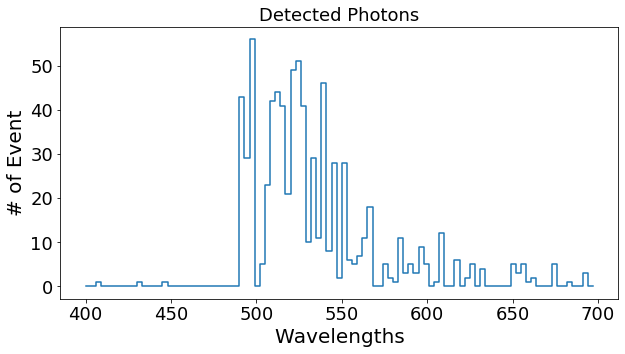

In [14]:
#### 3. ( 1D Histogram - 1D Histogram ) -> Step plot

filename1 = 'noKill_1GeV_HitData_Chrenkov.txt'
filename2 = 'Kill_1GeV_HitData_Chrenkov.txt'

bin_num = range(400,703,3) # (703-400)/3-1 = 100 bins

def plotHist(filename_1, filename_2, bin_num = 100):
    dataframe_1 = pd.read_csv(filename_1)
    data_1 = np.array(dataframe_1)
    counts_1, bins_1 = np.histogram(data_1, bins = bin_num)
    
    dataframe_2 = pd.read_csv(filename_2)
    data_2 = np.array(dataframe_2)
    counts_2, bins_2 = np.histogram(data_2, bins = bin_num)

    counts_3 = np.array(counts_1-counts_2)
    
    # Negative -> 0
    print(counts_3)
    for i in range(len(counts_3)):
        if counts_3[i]<0:
            counts_3[i]=0
    print('counts_3',counts_3, len(counts_3))
    
    #array->list, align bin #
    counts_3_list = counts_3.tolist()
    bins_1_list = bins_1.tolist()
    bins_1_list.pop(len(bins_1_list)-1)
    print('bins_1_list',bins_1_list, len(bins_1_list))
    
    #step plot
    plt.figure(figsize = (10,5))
    plt.step(bins_1_list,counts_3_list)
    plt.title("Detected Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
plotHist(filename1, filename2, bin_num)